# 代表的な前処理（無相関化・白色化）
- 相関係数が高い場合、一方の変数のみで事象を説明できることが多い
- これでは使える情報が減ってしまうため、相関を解消する前処理を施す

## 1. ライブラリの読み込み

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 標準化を行うためのクラス
from sklearn.preprocessing import StandardScaler

# 主成分分析を行うためのクラス
from sklearn.decomposition import PCA



## 2. 無相関化

### 2-1. 疑似データの生成
- 正の相関があるデータを用意する

相関係数: 0.728


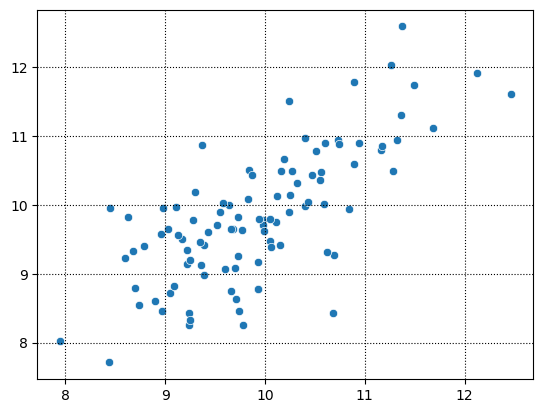

In [2]:
# 乱数シードの固定
np.random.seed(1234)

# 多変量正規分布からサンプリング
# 平均、分散共分散行列、データサイズを指定
data1 = np.random.multivariate_normal((10, 10), [[1, 0.8],[0.8, 1]], 100)

# 相関係数を計算
print('相関係数: {:.3f}'.format(np.corrcoef(data1[:, 0], data1[:, 1])[0,1]))

# グリッド線の表示
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

# 散布図の表示
sns.scatterplot(x=data1[:, 0], y=data1[:, 1], marker='o')
plt.show()

### 2-2. PCA() を用いる場合
- 主成分分析の過程で、無相関化が行われる

In [3]:
# 主成分分析のクラスをインスタンス化
# 主成分の数を、データ次元数と同じに設定
pca = PCA(n_components=data1.shape[1])

# 主成分分析を実行し、データを無相関化
data1_decorr = pca.fit_transform(data1)

### 2-3. 手計算で行う場合

In [4]:
# 分散共分散行列を求める
cov = np.cov(data1, rowvar=0) 

# 分散共分散行列を固有値分解
# 固有ベクトルを取り出す
_, S = np.linalg.eig(cov)           

# 固有ベクトルとデータの積をとる（無相関化）
data1_decorr = np.dot(S.T, data1.T).T 

### 2-4. 処理結果の表示

相関係数: -0.000


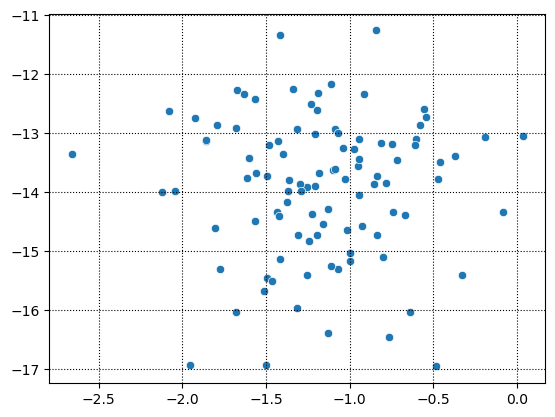

In [5]:
# 相関係数を計算
print('相関係数: {:.3f}'.format(np.corrcoef(data1_decorr[:, 0], data1_decorr[:, 1])[0,1]))

# グリッド線の表示
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')

# 散布図の表示
sns.scatterplot(x=data1_decorr[:, 0], y=data1_decorr[:, 1], marker='o')
plt.show()

- 無相関化によって説明変数間の相関がなくなったことがわかる
- ただしスケールの影響がまだ残っているため、次に標準化を施す（白色化）

## 3. 白色化

相関係数: -0.000


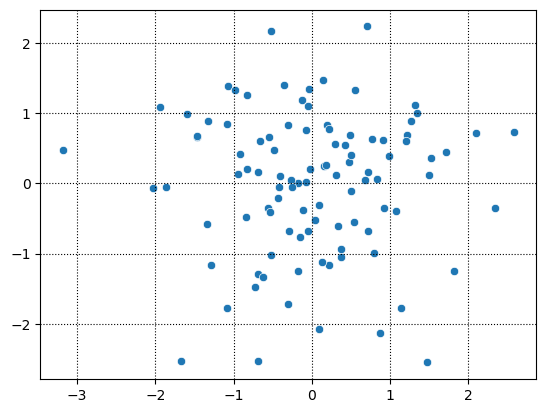

In [6]:
# 標準化を行うためのクラス
stdsc = StandardScaler()
# データの平均と標準偏差を計算
stdsc.fit(data1_decorr) 

# 無相関化したデータに、さらに標準化を実施
data1_whitening  = stdsc.transform(data1_decorr) 

# 相関係数を計算
print('相関係数: {:.3f}'.format(np.corrcoef(data1_whitening[:, 0], data1_whitening[:, 1])[0,1]))
# グリッド線の表示
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
# 散布図の表示
sns.scatterplot(x=data1_whitening[:, 0], y=data1_whitening[:, 1], marker='o')
plt.show()